In [1]:
#insert all the libraries
import cv2
import numpy as np
import face_recognition
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
import csv
from csv import writer
from datetime import date
from tkinter import *

In [2]:
#database for inserting users info into datadetails.csv which will be replaced into mysql
def append_list_as_row(file_name, list_of_elem):
    # Open file in append mode
    with open(file_name, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [3]:
#this is the database inserting function where; if the face recognition doesn't identify a person it will take name daughter/sons name
#this function will be replaced by java
def entry_database():
    #take name
    test_name=input()
    #take sons/daughters name
    test_so_dau_name=input()
    data=pd.read_csv("datadetails.csv")
    row, col = data.shape
    img_name=row+1
    #define image name as persons name
    test_image_name =str(img_name)
    #save the image into database
    test_image_name ='database/'+test_image_name+'.jpg'
    directory_img = '/home/ran/Desktop/Kaldi AIMS Lab/FaceRecognition/'+ test_image_name
    #saving data
    todays_date = date.today()
    os.rename(r'database/test_image.jpg',test_image_name)
    #saving all the data into database
    row_contents = [img_name,directory_img,test_name,test_so_dau_name,todays_date]
    append_list_as_row('datadetails.csv', row_contents)


In [4]:
def facerecog_function():
    data=pd.read_csv("datadetails.csv")
    row, col = data.shape 
    #we encode all the 
    encodeListKnown = joblib.load('filename.pkl') 
    cam = cv2.VideoCapture(0)

    if cam.isOpened():
        ret,frame = cam.read()
        #print(ret)
        #print(frame)
    else:
        ret=False

    test_image= cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    plt.title("Camera")
    plt.imshow(test_image)
    plt.show()
    cam.release()
    cv2.imwrite("database/test_image.jpg", frame)
    
  
    facesCurFrame=face_recognition.face_locations(test_image)
    encodeCurFrame= face_recognition.face_encodings(test_image,facesCurFrame)
    for encodeFace, facLoc in zip(encodeCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis= face_recognition.face_distance(encodeListKnown, encodeFace)
    if min(faceDis)<=0.5:
        data=pd.read_csv("datadetails.csv")
        matcheIndex= np.argmin(faceDis)
        print(matcheIndex)
        name = str(data.iloc[matcheIndex,2])
        print(name)
 
        
    else:
        print("this person is not in our database")
        encode_test=face_recognition.face_encodings(test_image)[0]
        encodeListKnown.append(encode_test)
        joblib.dump(encodeListKnown, 'filename.pkl') 
        entry_database()
        

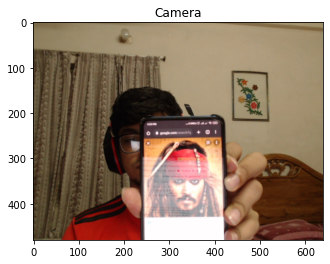

3
jack


In [10]:
facerecog_function()

import tkinter as tk

root = tk.Tk()

margin = 0.23
projectedSales = tk.IntVar()
profit = tk.IntVar()

entry = tk.Entry(root, textvariable=projectedSales)

entry.pack()

def profit_calculator():
    profit.set(margin * projectedSales.get())

labelProSales = tk.Label(root, textvariable=projectedSales)
labelProSales.pack()

labelProfit = tk.Label(root, textvariable=profit)
labelProfit.pack()

button_calc = tk.Button(root, text="Calculate", command=profit_calculator)
button_calc.pack()

root.mainloop()